<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:15px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Metals Classification </b></div>



<div style="border: 2px solid #5dade2; padding: 15px; border-radius: 8px; background-color: #f9f9f9;">
    In this project, I will perform Fluorescence-Based Metal Classification via Wavelength Excitation using RGB coordinates as features. By leveraging machine learning models and artificial neural networks, I aim to classify 9 different metal categories based on their fluorescence response.

The metals included in this classification are: Chromium (Cr6+), Cadmium (Cd2+), Cobalt (Co2+), Tin (Sn2+), Aluminum (Al3+), Silver (Ag+), Mercury (Hg2+), Zinc (Zn2+), and Copper (Cu2+).

This approach enables accurate and efficient identification of metals using fluorescence spectroscopy, offering potential applications in environmental monitoring, water quality assessment, and material analysis. 🚀
</div>

<div style="text-align: center;">
    <img src="https://chem.libretexts.org/@api/deki/files/108719/CNX_Chem_19_03_Lightper1.jpg?revision=1&size=bestfit&width=834&height=303" alt="alzheimers" style="width:100%; height:auto; border-radius: 30px;">
</div>

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Import libraries </b></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Create Dataframe </b></div>

In [2]:
df = pd.read_excel("/kaggle/input/multi-wavelength-for-metal-classification/Clasif_4_10mM_8mM_6mM.xlsx")
df.head()

,Class,R_10,R_8,R_6,G_10,G_8,G_6,B_10,B_8,B_6
0,Cr6,121.672054,109.359213,90.471411,124.451532,123.095702,112.594114,17.292427,21.563033,25.679999
1,Cr6,121.112364,111.078571,89.707904,125.224216,119.413744,111.906582,14.712391,14.392525,25.054435
2,Cr6,123.482756,110.283060,92.588624,126.517010,119.108594,115.020900,15.088266,19.131002,29.599695
3,Cr6,130.849574,114.185563,90.710288,124.409015,125.553447,110.210652,18.281800,22.302888,34.465752
4,Cr6,125.905786,109.996709,87.328086,125.597695,117.168442,108.006616,19.037181,22.967507,34.676065


<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Data Visualization </b></div>

In [3]:
string_columns = df.select_dtypes(include=('object')).columns
string_columns

Index(['Class'], dtype='object')

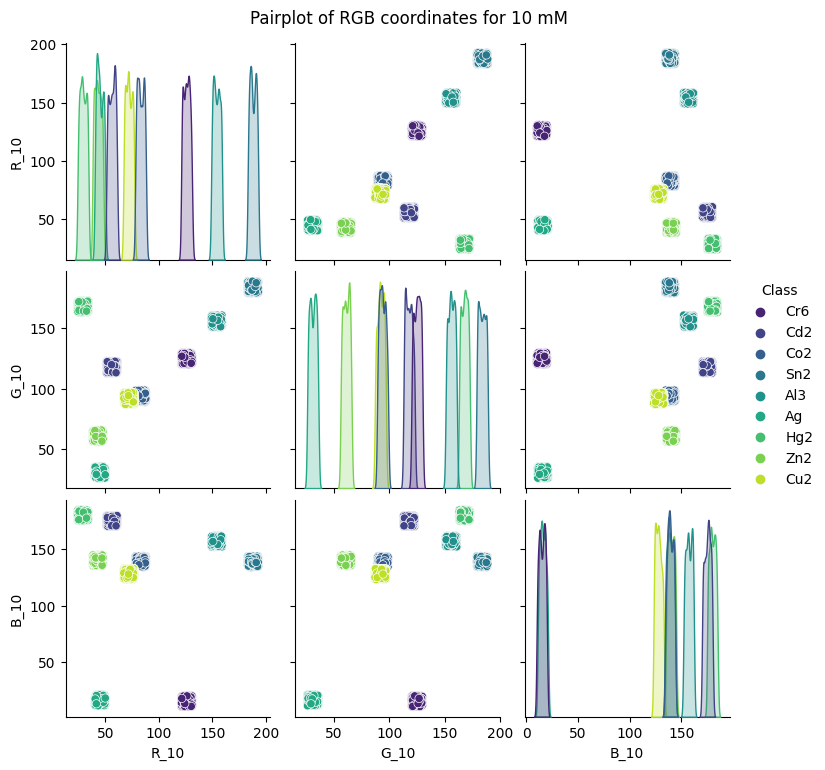

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

other_attributes = ['Class', 'R_10', 'G_10', 'B_10']

pairplot = sns.pairplot(df[other_attributes], hue='Class', palette='viridis')

pairplot.fig.suptitle('Pairplot of RGB coordinates for 10 mM', y=1.02)

plt.show()

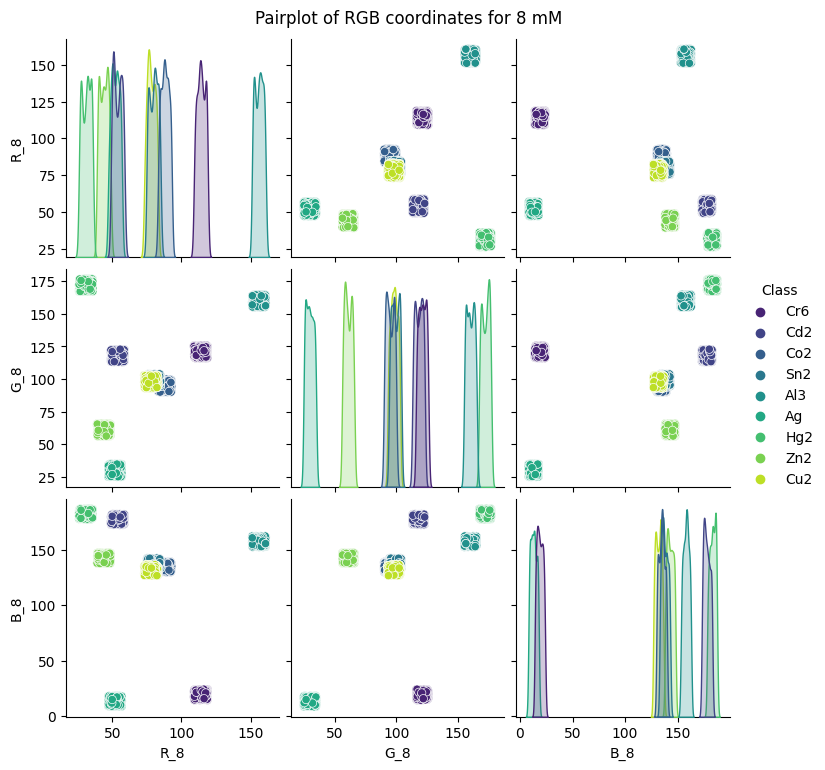

In [5]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

other_attributes = ['Class', 'R_8', 'G_8', 'B_8']

pairplot = sns.pairplot(df[other_attributes], hue='Class', palette='viridis')

pairplot.fig.suptitle('Pairplot of RGB coordinates for 8 mM', y=1.02)

plt.show()

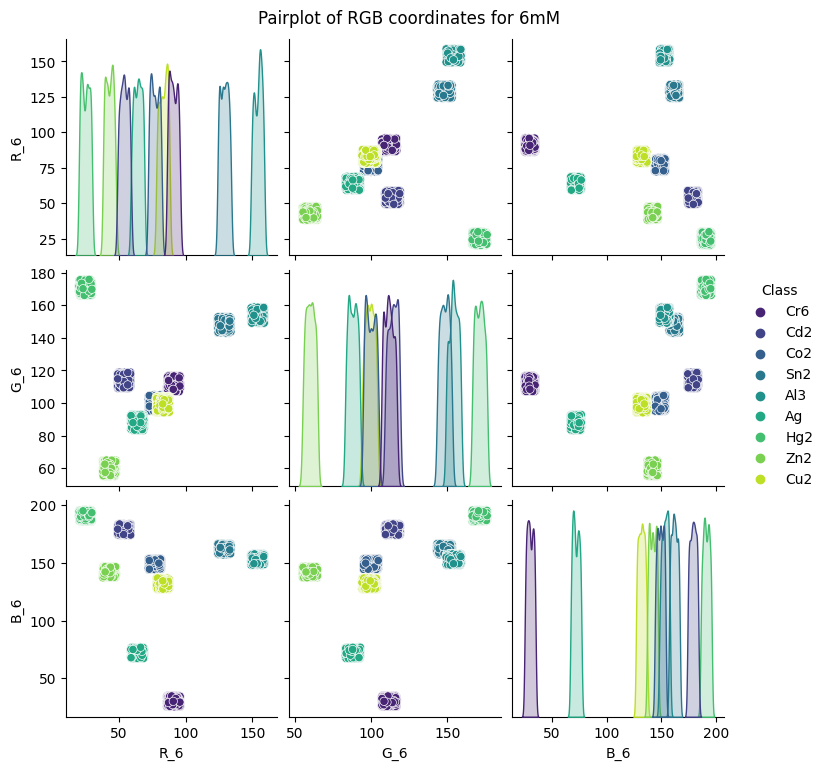

In [6]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

other_attributes = ['Class', 'R_6', 'G_6', 'B_6']

pairplot = sns.pairplot(df[other_attributes], hue='Class', palette='viridis')

pairplot.fig.suptitle('Pairplot of RGB coordinates for 6mM', y=1.02)

plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Feature engineering </b></div>

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
class_mappings = {}


for col in string_columns:
    le.fit(df[col].astype('str'))
    
    class_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_) + 1))
    df[col] = le.transform(df[col].astype('str')) + 1 

print("DataFrame updated:")
print(df.head())

print("\nMapping classes:")
for col, mapping in class_mappings.items():
    print(f"{col}: {mapping}")

DataFrame updated:
   Class        R_10         R_8        R_6        G_10         G_8  \
0      5  121.672054  109.359213  90.471411  124.451532  123.095702   
1      5  121.112364  111.078571  89.707904  125.224216  119.413744   
2      5  123.482756  110.283060  92.588624  126.517010  119.108594   
3      5  130.849574  114.185563  90.710288  124.409015  125.553447   
4      5  125.905786  109.996709  87.328086  125.597695  117.168442   

          G_6       B_10        B_8        B_6  
0  112.594114  17.292427  21.563033  25.679999  
1  111.906582  14.712391  14.392525  25.054435  
2  115.020900  15.088266  19.131002  29.599695  
3  110.210652  18.281800  22.302888  34.465752  
4  108.006616  19.037181  22.967507  34.676065  

Mapping classes:
Class: {'Ag': 1, 'Al3': 2, 'Cd2': 3, 'Co2': 4, 'Cr6': 5, 'Cu2': 6, 'Hg2': 7, 'Sn2': 8, 'Zn2': 9}


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in sss.split(df, df["Class"]):
  strat_train_dataset = df.loc[train_index]
  strat_test_dataset = df.loc[test_index]


In [9]:
train_index, test_index= next(sss.split(df, df["Class"]))
strat_train_dataset = df.loc[train_index]
strat_test_dataset = df.loc[test_index]

In [10]:
strat_test_distribution = strat_test_dataset["Class"]*10 / len(strat_test_dataset)
strat_test_distribution

286     0.111111
331     0.111111
275     0.111111
3556    0.200000
4091    0.133333
          ...   
3524    0.200000
758     0.066667
1843    0.177778
3402    0.155556
1445    0.088889
Name: Class, Length: 450, dtype: float64

In [11]:
features_train = strat_train_dataset.drop("Class", axis=1)

labels_train = strat_train_dataset['Class'].copy()

In [12]:
features_test = strat_test_dataset.drop("Class", axis=1)

labels_test = strat_test_dataset['Class'].copy()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Standardize the features using StandardScaler </b></div>

In [13]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(features_train)

scaled_features_train = scaler.transform(features_train)
scaled_features_train

array([[ 1.3484261 ,  2.21918846,  1.80137346, ...,  0.61563243,
         0.52211344,  0.32500443],
       [-0.14214643,  0.36990919, -0.17887752, ...,  0.2749291 ,
         0.16710805,  0.38085463],
       [ 1.81679005,  0.06088513,  1.2630644 , ...,  0.35872717,
         0.18684298,  0.47238166],
       ...,
       [-1.0742307 , -1.25224449, -1.38541461, ...,  0.96131114,
         1.03318075,  1.05629688],
       [ 0.68593892,  0.99413965,  0.21166336, ..., -1.82908368,
        -1.74393837, -2.12780674],
       [-0.55736186, -0.69976233, -0.57442791, ...,  0.83764645,
         0.87287471,  0.81507145]])

In [14]:

scaled_features_test = scaler.transform(features_test)
scaled_features_test

array([[ 0.68407486,  1.03595703,  0.3229832 , ..., -1.8579881 ,
        -1.68326985, -2.1964589 ],
       [ 0.80735973,  1.04151856,  0.27711823, ..., -1.82796246,
        -1.79163751, -2.16437502],
       [ 0.81263027,  1.06981364,  0.38669844, ..., -1.86698508,
        -1.655732  , -2.05772125],
       ...,
       [ 1.92465368,  0.04963612,  1.37282154, ...,  0.29946279,
         0.32616398,  0.49030001],
       [-1.10321407, -1.18122277, -1.47029366, ...,  0.95927724,
         1.01432629,  1.12200093],
       [-0.09903868,  0.25005958, -0.0461627 , ...,  0.33936984,
         0.15463811,  0.39245351]])

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Machine Learning Models </b></div>

In [15]:
# Classification models with default parameters
Classification_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Support Vector Machine': SVC()
    
}

Decision Tree accuracy: 1.00
Random Forest accuracy: 1.00
Gradient Boosting accuracy: 1.00
K-Nearest Neighbors accuracy: 1.00
Logistic Regression accuracy: 1.00
SGD Classifier accuracy: 1.00
Support Vector Machine accuracy: 1.00


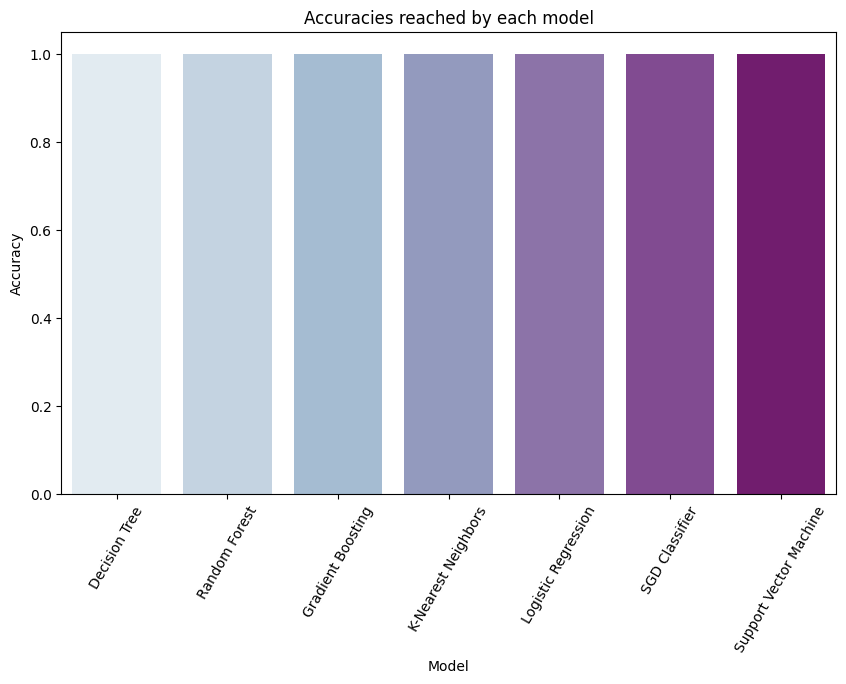

In [16]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in Classification_models.items():
    clf.fit(scaled_features_train, labels_train)
    predictions = clf.predict(scaled_features_test)
    score = clf.score(scaled_features_test, labels_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=models, palette='BuPu')
plt.title('Accuracies reached by each model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=60)
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Machine Learning Models Evaluation </b></div>

Decision Tree Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



Random Forest Evaluation Metrics:

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3  

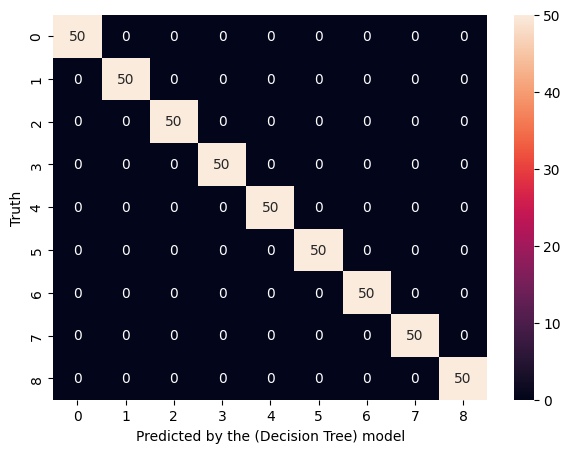

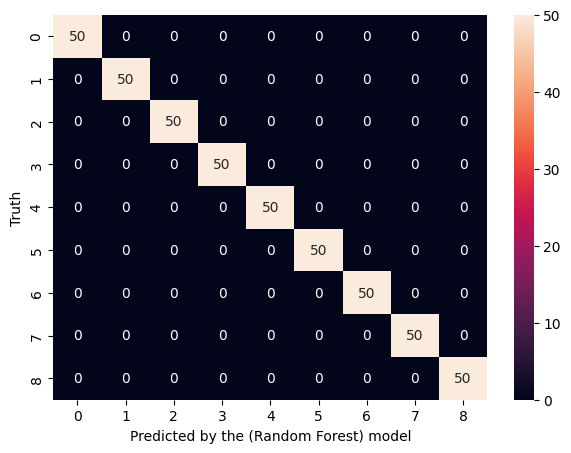

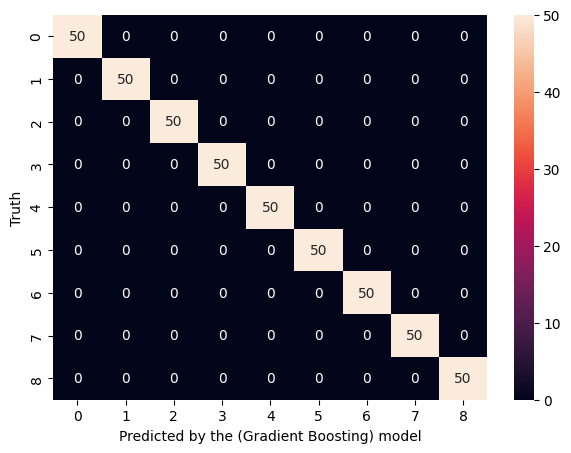

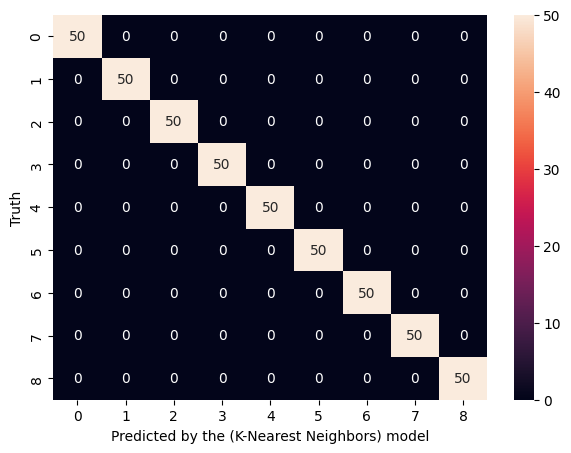

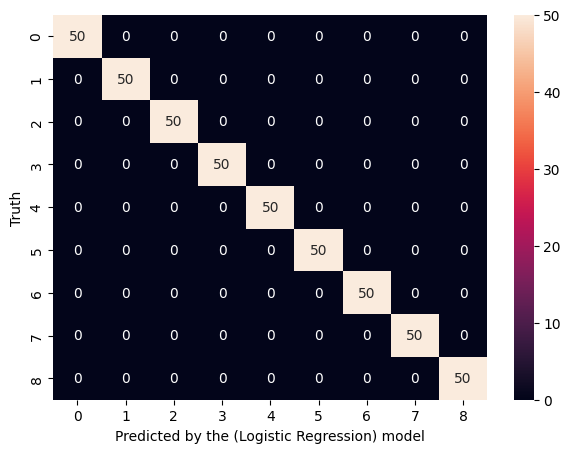

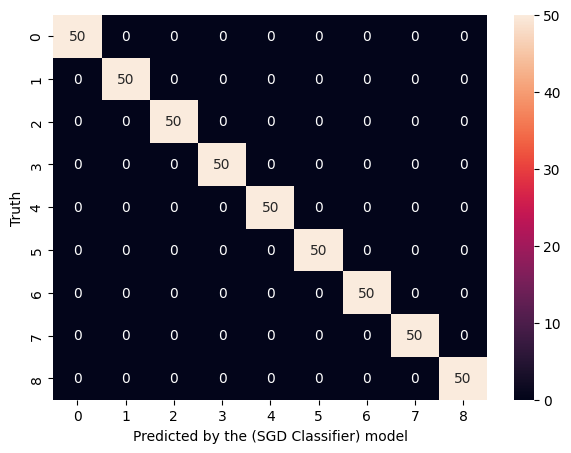

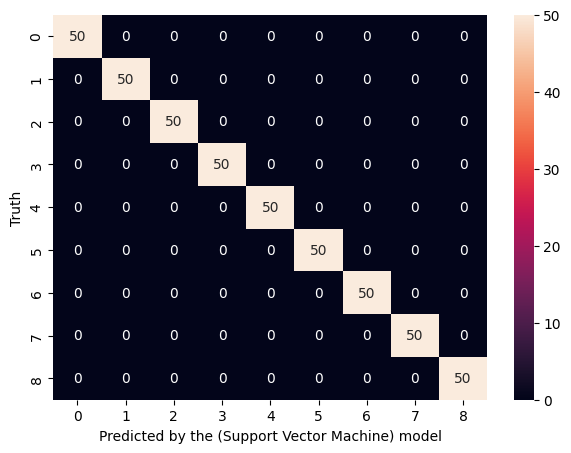

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tabulate import tabulate
# Initializing a dictionary to store evaluation metrics
model_evaluation_metrics = {}

# Iterating over each model to evaluate
for model_name, model in Classification_models.items():
    # Predict on the test set
    y_pred = model.predict(scaled_features_test)
    
    # Calculate confusion matrix and classification report
    cm = confusion_matrix(labels_test, y_pred)
    classif_report = classification_report(labels_test, y_pred)
    
    # Storing the results
    model_evaluation_metrics[model_name] = {
        "Confusion Matrix":cm,
        'Classification Report': classif_report
    }
    
     
    print(f"{model_name} Evaluation Metrics:")
    print("\nClassification Report:")
    print(classif_report)
    print("\n" + "="*60 + "\n")
    plt.figure(figsize=(7,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel(f"Predicted by the ({model_name}) model")
    plt.ylabel('Truth'),

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Neural Network Model </b></div>

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

def adjust_labels(labels):
    return labels - 1


adjusted_labels_train = adjust_labels(labels_train)
adjusted_labels_test = adjust_labels(labels_test)

num_classes=9
one_hot_labels_train = keras.utils.to_categorical(adjusted_labels_train, num_classes=9)

model_ANN = keras.Sequential([
    keras.layers.Dense(256, input_shape=(9,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax')  # Capa de salida para clasificación multiclase
])


model_ANN.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


history = model_ANN.fit(scaled_features_train, one_hot_labels_train, epochs=50, validation_split=0.1, verbose=1)


y_pred_prob = model_ANN.predict(scaled_features_test)
y_pred = np.argmax(y_pred_prob, axis=1)  


labels_test_integers = adjusted_labels_test


print("Size of y_pred:", len(y_pred))
print("Size of labels_test_integers:", len(labels_test_integers))

  
    
class_mapping = {
    'Ag': 1, 'Al3': 2, 'Cd2': 3, 'Co2': 4, 'Cr6': 5, 'Cu2': 6, 'Hg2': 7, 'Sn2': 8, 'Zn2': 9
}

inverse_mapping = {v: k for k, v in class_mapping.items()}



cm = confusion_matrix(labels_test_integers, y_pred)

labels = [inverse_mapping[i] for i in sorted(inverse_mapping.keys())]

# Mostrar la matriz de confusión con nombres reales
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#disp.plot(cmap='viridis', xticks_rotation=0)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7182 - loss: 1.1703 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 8.2445e-04
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.7624e-04 - val_accuracy: 1.0000 - val_loss: 3.6398e-04
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.9326e-04 - val_accuracy: 1.0000 - val_loss: 1.7295e-04
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0046e-04 - val_accuracy: 1.0000 - val_loss: 1.0548e-04
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.8144e-05 - val_accuracy: 1.0000 - val_loss: 8.8061e-05
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.5664e-05 - val_accuracy: 1.0000 - val_loss: 5.5529e-05
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

In [19]:
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,269 (540.12 KB)

 Trainable params: 46,089 (180.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,180 (360.08 KB)

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Neural Network Model Evaluation </b></div>

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



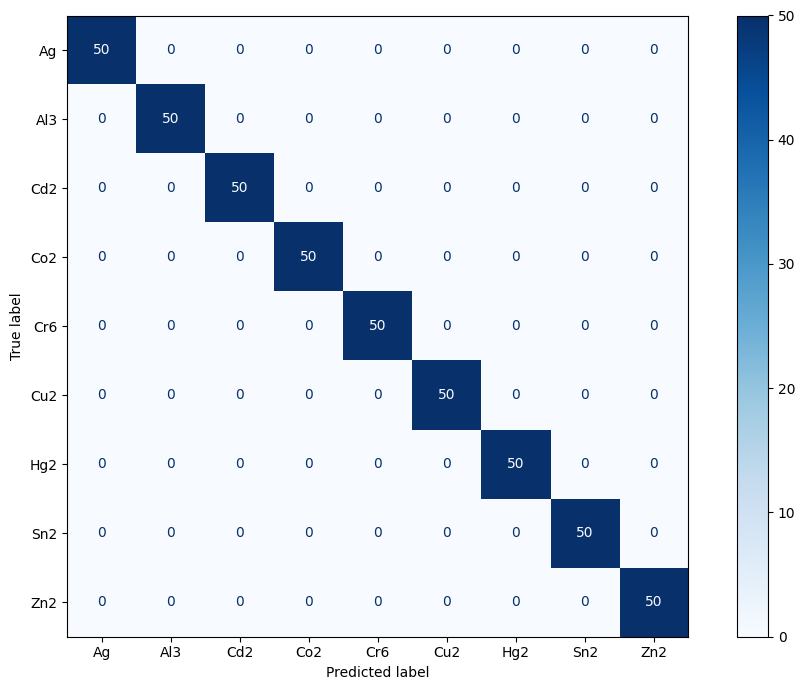

In [20]:
if len(y_pred) == len(labels_test_integers):
   
    print("Classification Report:\n", classification_report(labels_test_integers, y_pred))
    
fig, ax = plt.subplots(figsize=(10, 7)) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax) 

plt.tight_layout()
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 15px; padding:8px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#5dade2; overflow:hidden"><b> Conclusion </b></div>

<div style="border: 2px solid #5dade2; padding: 15px; border-radius: 8px; background-color: #f9f9f9;">
   In this project, we successfully performed Fluorescence-Based Metal Classification via Wavelength Excitation using RGB coordinates as features. By applying machine learning models and artificial neural networks, we achieved an outstanding accuracy of 100% in classifying 9 different metal categories: Chromium (Cr6+), Cadmium (Cd2+), Cobalt (Co2+), Tin (Sn2+), Aluminum (Al3+), Silver (Ag+), Mercury (Hg2+), Zinc (Zn2+), and Copper (Cu2+).
    
The results demonstrate the effectiveness of combining fluorescence spectroscopy with AI-based classification techniques, making this approach a powerful tool for environmental monitoring, industrial quality control, and advanced material analysis. The ability to achieve perfect accuracy highlights the potential of using RGB-based fluorescence data for precise and automated metal identification. 🚀
</div>

Thank you for exploring this notebook! If you find it helpful, please consider upvoting it ❤️.

Your support is always appreciated 🤩!